In [1]:
pip install convokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.2/183.2 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for pandas>=0.23.4 from https://files.pythonhosted.org/packages/af/7b/d170f9c8306c7673f57ca4f442e326d36e20299725edc5d0af36a3e3b041/pandas-2.1.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for spacy>=2.3.5 from https://files.pythonhosted.org/packages/66/32/7cd50cc40a1dd52c1e4d0f374aaffe32d91e40c0eec7100f5e288413c29a/spacy-3.6.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for scipy>=1.1.0 from https://files.pythonhosted.org/packages/50/8b/2057417a07a6fee8ed8be40e37bac4a502cae4cf44468a02962bbe81b8af/scipy-1.11.3-cp311-cp311-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 10.4 MB/s eta 0:00:00
  Obtaining dependency information for sci

In [2]:
from convokit import Corpus, download

# download dataset from source
# https://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html

corpus = Corpus(filename=download("movie-corpus"))

No configuration file found at /Users/charlesbelinky/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
default_backend: mem


In [10]:
# Cornell Movie Dialogue Corpus summary

corpus.print_summary_stats()

Number of Speakers: 9035
Number of Utterances: 304713
Number of Conversations: 83097


In [58]:
# For each conversation, utterance, and speaker in the movie corpus, create a dataframe consisting of the relevant metadata

# conversations
# DataFrame of the conversations with fields and metadata attributes
c_df = corpus.get_conversations_dataframe()

# utterances
# DataFrame of the utterances with fields and metadata attributes
u_df = corpus.get_utterances_dataframe()

# speakers
# DataFrame of the Speakers with fields and metadata attributes
s_df = corpus.get_speakers_dataframe()

In [17]:
# conversations
c_df.head()

,vectors,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
id,,,,,,,
L1044,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L984,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L924,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L870,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L866,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"


In [59]:
# utterances
u_df.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors
id,,,,,,,,
L1045,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[]
L1044,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[]
L985,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[]
L984,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[]
L925,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[]


In [26]:
# speakers
s_df.head()

,vectors,meta.character_name,meta.movie_idx,meta.movie_name,meta.gender,meta.credit_pos
id,,,,,,
u0,[],BIANCA,m0,10 things i hate about you,f,4
u2,[],CAMERON,m0,10 things i hate about you,m,3
u3,[],CHASTITY,m0,10 things i hate about you,?,?
u4,[],JOEY,m0,10 things i hate about you,m,6
u5,[],KAT,m0,10 things i hate about you,f,2


In [27]:
import pandas as pd

# merge utterance and speaker dfs using speaker id to join
df = pd.merge(u_df, s_df, how='inner', left_on='speaker', right_on='id')

df.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors_x,vectors_y,meta.character_name,meta.movie_idx,meta.movie_name,meta.gender,meta.credit_pos
0,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],BIANCA,m0,10 things i hate about you,f,4
1,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[],[],BIANCA,m0,10 things i hate about you,f,4
2,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[],[],BIANCA,m0,10 things i hate about you,f,4
3,None,Okay -- you're gonna need to learn how to lie.,u0,L871,L870,m0,"[{'rt': 4, 'toks': [{'tok': 'Okay', 'tag': 'UH...",[],[],BIANCA,m0,10 things i hate about you,f,4
4,None,I'm kidding. You know how sometimes you just ...,u0,None,L870,m0,"[{'rt': 2, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[],[],BIANCA,m0,10 things i hate about you,f,4


In [28]:
# merge conversation df to the df created by the previous merge using conversation id to join
df = pd.merge(df, c_df, how='inner', left_on='conversation_id', right_on='id')

df.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors_x,vectors_y,meta.character_name,...,meta.movie_name_x,meta.gender,meta.credit_pos,vectors,meta.movie_idx_y,meta.movie_name_y,meta.release_year,meta.rating,meta.votes,meta.genre
0,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],BIANCA,...,10 things i hate about you,f,4,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
1,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],CAMERON,...,10 things i hate about you,m,3,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
2,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[],[],BIANCA,...,10 things i hate about you,f,4,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
3,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[],[],CAMERON,...,10 things i hate about you,m,3,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
4,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[],[],BIANCA,...,10 things i hate about you,f,4,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"


In [31]:
# remove null text fields
df = df[df['text'].notnull()]

In [32]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

wordnet_lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    Clean and preprocesses text data.

    Args:
        text (str): Input text to be cleaned.

    Returns:
        str: Cleaned text.
    """
    # Step 1: Remove non-alphabetic characters and replace with space
    letters_only = re.sub("[^a-zA-Z]", " ", text)

    # Step 2: Convert to lowercase and split into words
    words = letters_only.lower().split()

    # Step 3: Set up a set of English stopwords
    stops = set(stopwords.words("english"))

    # Step 4: Lemmatize words that are not in the stopwords list
    meaningful_words = [wordnet_lemmatizer.lemmatize(w) for w in words if not w in stops]

    # Step 5: Join the lemmatized words back into a string
    return " ".join(meaningful_words)

# clean the text field containing dialogue
df['cleaned_text'] = df['text'].apply(clean_text)


In [33]:
# text before and after cleaning
df[['cleaned_text', 'text']].head()

,cleaned_text,text
0,,They do not!
1,,They do to!
2,hope,I hope so.
3,okay,She okay?
4,let go,Let's go.


In [60]:
def get_text(genre):
    """
    Retrieve texts based on specified genres.

    Args:
        genre (str or list of str): The genre(s) to search for.

    Returns:
        numpy.ndarray: An array of texts that match the specified genre(s).
                       Returns "Not Found" if no matching texts are found.
    """
    if isinstance(genre, str):
        genre = [genre]
    
    # Filter DataFrame to get texts with specified genre(s)
    texts = df[df['meta.genre'].apply(lambda x: any(item in x for item in genre))]['cleaned_text'].values
    
    # If no texts are found, print "Not Found" and return it
    if texts.shape[0] == 0:
        print("Not Found")
        return "Not Found"
    
    return texts

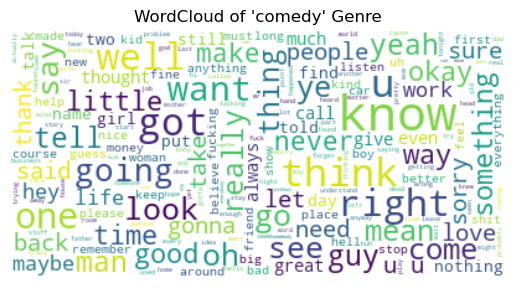

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def get_wordcloud(genre):
    """
    Generate a word cloud based on texts from a specified genre.

    Args:
        genre (str): The genre to search for.

    """
    # Get texts for the specified genre
    texts = list(get_text(genre))

    # Extract individual words from the texts
    words = [word for text in texts for word in text.split(" ")]

    # Generate the word cloud
    wordcloud = WordCloud(max_font_size=40, background_color="white").generate(" ".join(words))

    # Display the word cloud
    plt.figure()
    plt.title("WordCloud of '%s' Genre" % (genre))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

get_wordcloud('comedy')

In [55]:
import random
import ast

def random_wordcloud():
    """
    Generate a random word cloud based on a randomly selected genre.
    
    """
    # Select a random row from the DataFrame
    sample = df.sample(1)

    # Extract the genres from the selected row
    genres = ast.literal_eval(sample['meta.genre'].values[0])

    # Randomly choose a genre from the list
    genre = random.choice(genres)

    # Generate and display the word cloud for the chosen genre
    get_wordcloud(genre)


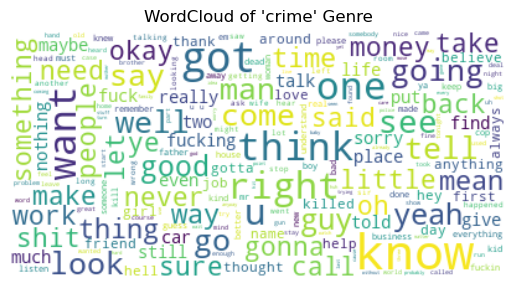

In [57]:
# generate a wordcloud from a random genre
random_wordcloud()